In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/neo_data_year.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7071 entries, 0 to 7070
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                7071 non-null   object 
 1   ID                                  7071 non-null   int64  
 2   Name                                7071 non-null   object 
 3   Neo Reference ID                    7071 non-null   int64  
 4   NASA JPL URL                        7071 non-null   object 
 5   Absolute Magnitude H                7070 non-null   float64
 6   Estimated Diameter Min (km)         7070 non-null   float64
 7   Estimated Diameter Max (km)         7070 non-null   float64
 8   Is Potentially Hazardous Asteroid   7071 non-null   bool   
 9   Close Approach Date Full            7071 non-null   object 
 10  Relative Velocity (km/h)            7071 non-null   float64
 11  Miss Distance (astronomical units)  7071 no

In [4]:
df.head()

,Date,ID,Name,Neo Reference ID,NASA JPL URL,Absolute Magnitude H,Estimated Diameter Min (km),Estimated Diameter Max (km),Is Potentially Hazardous Asteroid,Close Approach Date Full,Relative Velocity (km/h),Miss Distance (astronomical units),Miss Distance (kilometers),Orbiting Body
0,2023-02-13,2005879,5879 Almeria (1992 CH1),2005879,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.62,0.795344,1.778443,False,2023-Feb-13 18:47,48558.644612,0.374378,5.600616e+07,Earth
1,2023-02-13,2138911,138911 (2001 AE2),2138911,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.44,0.343997,0.769201,False,2023-Feb-13 10:38,14189.656715,0.330264,4.940675e+07,Earth
2,2023-02-13,2187026,187026 (2005 EK70),2187026,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.40,0.880147,1.968067,False,2023-Feb-13 13:58,60677.141072,0.335621,5.020812e+07,Earth
3,2023-02-13,2380818,380818 (2005 YV128),2380818,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.66,0.196135,0.438571,False,2023-Feb-13 01:07,49358.952696,0.413056,6.179234e+07,Earth
4,2023-02-13,2518810,518810 (2010 CF19),2518810,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.85,0.113385,0.253536,True,2023-Feb-13 10:05,59261.678346,0.309865,4.635520e+07,Earth


In [6]:
df.tail()

,Date,ID,Name,Neo Reference ID,NASA JPL URL,Absolute Magnitude H,Estimated Diameter Min (km),Estimated Diameter Max (km),Is Potentially Hazardous Asteroid,Close Approach Date Full,Relative Velocity (km/h),Miss Distance (astronomical units),Miss Distance (kilometers),Orbiting Body
7066,2024-02-01,2627157,627157 (2008 OX1),2627157,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.500,0.133216,0.297879,True,2024-Feb-01 14:11,69389.130552,0.220967,3.305620e+07,Earth
7067,2024-02-01,54393146,(2023 TN9),54393146,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.620,0.126054,0.281864,False,2024-Feb-01 22:22,47188.261796,0.336279,5.030666e+07,Earth
7068,2024-02-01,54418658,(2023 YB2),54418658,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.823,0.045704,0.102197,False,2024-Feb-01 19:51,37153.013903,0.118143,1.767395e+07,Earth
7069,2024-02-01,54421383,(2024 BY),54421383,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,26.224,0.015127,0.033825,False,2024-Feb-01 22:06,19333.652277,0.016937,2.533809e+06,Earth
7070,2024-02-01,54423831,(2024 CS),54423831,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.443,0.021675,0.048466,False,2024-Feb-01 09:20,61149.371465,0.006805,1.018082e+06,Earth


In [ ]:
ndf=df.dropna()
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7070 entries, 0 to 7070
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                7070 non-null   object 
 1   ID                                  7070 non-null   int64  
 2   Name                                7070 non-null   object 
 3   Neo Reference ID                    7070 non-null   int64  
 4   NASA JPL URL                        7070 non-null   object 
 5   Absolute Magnitude H                7070 non-null   float64
 6   Estimated Diameter Min (km)         7070 non-null   float64
 7   Estimated Diameter Max (km)         7070 non-null   float64
 8   Is Potentially Hazardous Asteroid   7070 non-null   bool   
 9   Close Approach Date Full            7070 non-null   object 
 10  Relative Velocity (km/h)            7070 non-null   float64
 11  Miss Distance (astronomical units)  7070 non-nul

In [ ]:
sns.set()

**SCATTER PLOT**

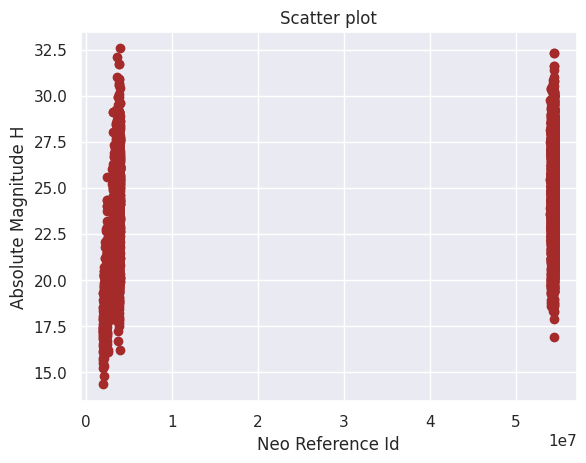

In [ ]:
plt.scatter(df['Neo Reference ID'], df['Absolute Magnitude H'], c='brown')
plt.title('Scatter plot')
plt.xlabel('Neo Reference Id')
plt.ylabel('Absolute Magnitude H')
plt.show()

**HISTOGRAM**

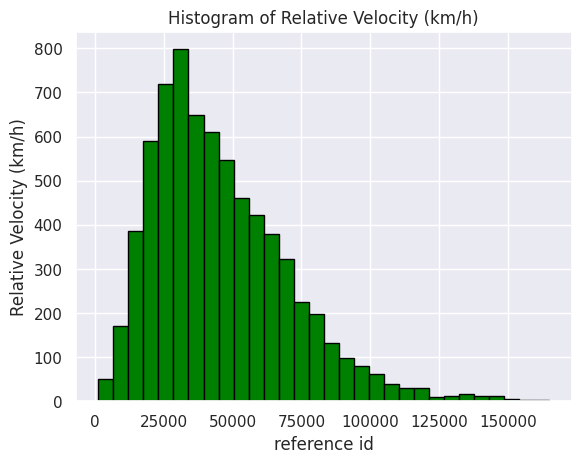

In [ ]:
plt.hist(df['Relative Velocity (km/h)'],color='green',edgecolor='black',bins=30)
plt.title('Histogram of Relative Velocity (km/h)')
plt.xlabel('reference id')
plt.ylabel('Relative Velocity (km/h)')
plt.show()

**LINEPLOT**

<Axes: >

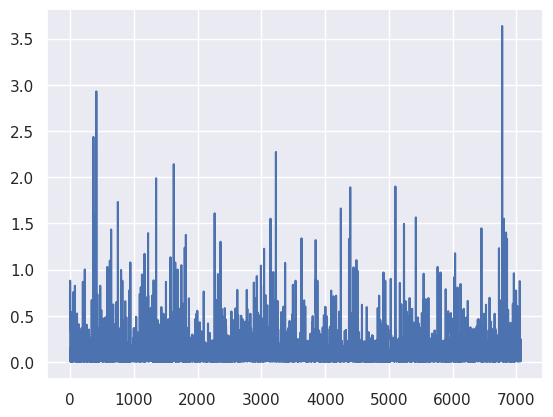

In [ ]:
df['Estimated Diameter Min (km)'].plot()

In [ ]:
pip install wordcloud matplotlib

**WORDCLOUD**

In [ ]:
text= " ".join(item for item in ndf['Name'])
print(text)

5879 Almeria (1992 CH1) 138911 (2001 AE2) 187026 (2005 EK70) 380818 (2005 YV128) 518810 (2010 CF19) (2008 EA8) (2012 DT32) (2015 LE21) (2017 DR34) (2017 HZ4) (2018 BV) (2018 NF15) (2019 EO) (2019 KK3) (2019 RE3) (2020 AW2) (2020 TK5) (2021 AR) (2021 EP4) (2022 SF4) (2023 BK2) (2023 CJ1) (2023 CB3) (2023 RM16) 141495 (2002 EZ11) 302311 (2002 AA) (2005 QB5) (2009 CS1) (2012 BO77) (2013 CW83) (2013 OW2) (2019 FR) (2019 UP13) (2019 YE4) (2020 YW3) (2021 AB1) (2021 CF4) (2022 UM) (2023 AJ2) (2023 CL1) (2023 CK2) (2023 CD3) (2023 CM3) (2023 CR3) (2023 DO1) (2023 MT2) (2023 TC7) 138971 (2001 CB21) 264308 (1999 NA5) (2013 BB74) (2015 CA14) (2015 DU180) (2015 NG13) (2016 LE9) (2017 AE5) (2018 RF2) (2019 BV1) (2021 AG6) (2021 CH1) (2021 GL16) (2021 NS8) (2021 VC4) (2022 CK6) (2022 OS2) (2022 RS) (2022 SP4) (2023 BD6) (2023 BO6) (2023 BC8) (2023 CY) (2023 CQ2) (2023 CN3) (2023 EE) (2023 EG) (2023 ED2) (2023 VN2) (2024 BZ3) 162483 (2000 PJ5) 215442 (2002 MQ3) (2014 DJ10) (2019 JD7) (2019 SH3) (202

In [ ]:
stopwords = set(STOPWORDS)

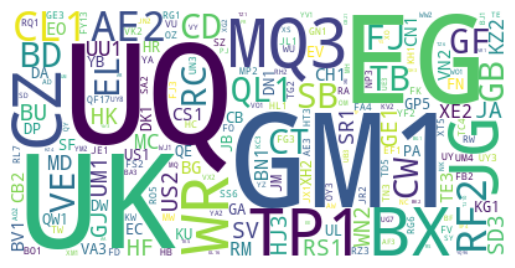

In [ ]:
wordcloud = WordCloud(background_color="White").generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<Axes: xlabel='Miss Distance (kilometers)'>

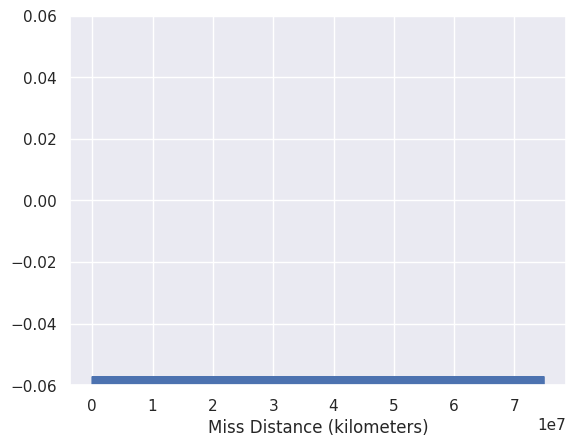

In [ ]:
sns.rugplot(df['Miss Distance (kilometers)'])

<ipython-input-12-4715fa789a36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Absolute Magnitude H'], kde=True, color='green').set_title('Dist plot')


Text(0.5, 1.0, 'Dist plot')

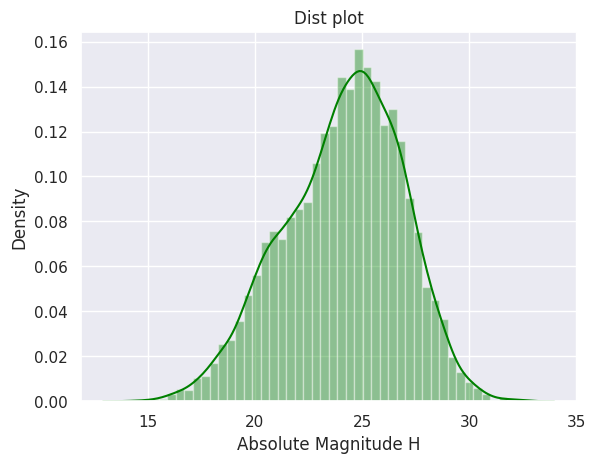

In [ ]:
sns.distplot(df['Absolute Magnitude H'], kde=True, color='green').set_title('Dist plot')

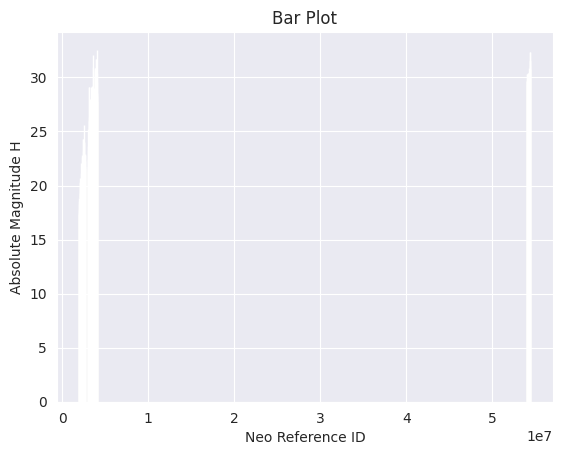

In [ ]:
# prompt: create all possible types of plots using df

# **BAR PLOT**
plt.bar(df['Neo Reference ID'], df['Absolute Magnitude H'],color='blue')
plt.title('Bar Plot')
plt.xlabel('Neo Reference ID')
plt.ylabel('Absolute Magnitude H')
plt.show()



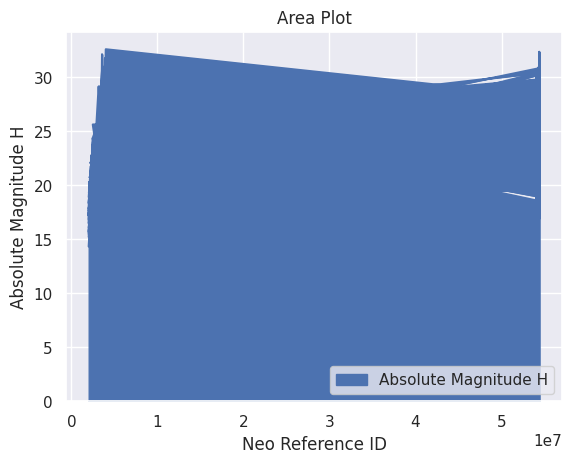

In [ ]:
# **AREA PLOT**
df.plot.area(x='Neo Reference ID', y='Absolute Magnitude H')
plt.title('Area Plot')
plt.xlabel('Neo Reference ID')
plt.ylabel('Absolute Magnitude H')
plt.show()


<ipython-input-7-ebe046df78bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is Potentially Hazardous Asteroid', y='Relative Velocity (km/h)', data = df,palette='plasma',estimator=np.std,ax=ax[0,0]).set_title('Bar Plot')
<ipython-input-7-ebe046df78bb>:18: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x='Is Potentially Hazardous Asteroid',y='Absolute Magnitude H',color="b",scale="linear",data=df,ax=ax[3,0])


<Axes: xlabel='Is Potentially Hazardous Asteroid', ylabel='Absolute Magnitude H'>

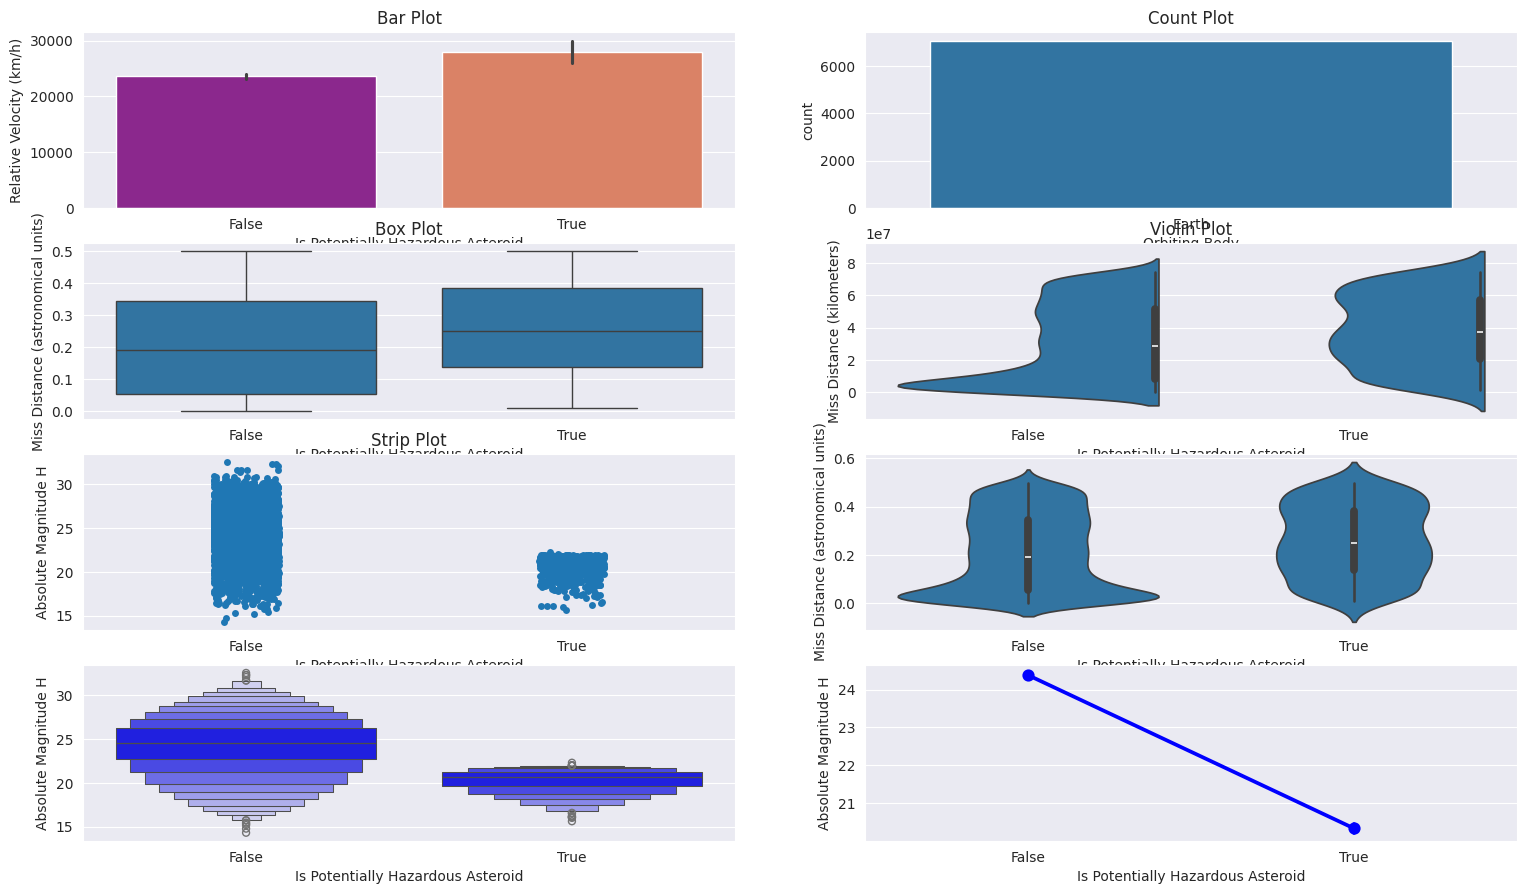

In [ ]:
sns.set_style('darkgrid')
fig, ax= plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(18.5, 10.5)

sns.barplot(x='Is Potentially Hazardous Asteroid', y='Relative Velocity (km/h)', data = df,palette='plasma',estimator=np.std,ax=ax[0,0]).set_title('Bar Plot')

sns.countplot(x='Orbiting Body', data = df,ax=ax[0,1]).set_title('Count Plot')

sns.boxplot(x='Is Potentially Hazardous Asteroid',y='Miss Distance (astronomical units)',data=df, ax=ax[1,0]).set_title('Box Plot')

sns.violinplot(x='Is Potentially Hazardous Asteroid',y='Miss Distance (kilometers)',data=df, split=True, ax=ax[1,1]).set_title('Violin Plot')

sns.stripplot(x='Is Potentially Hazardous Asteroid',y='Absolute Magnitude H',data=df, jitter= True,dodge=True, ax=ax[2,0]).set_title('Strip Plot')


sns.violinplot(x='Is Potentially Hazardous Asteroid',y='Miss Distance (astronomical units)',data=df,ax=ax[2,1])

sns.boxenplot(x='Is Potentially Hazardous Asteroid',y='Absolute Magnitude H',color="b",scale="linear",data=df,ax=ax[3,0])

sns.pointplot(x='Is Potentially Hazardous Asteroid',y='Absolute Magnitude H',color="b",data=df,ax=ax[3,1])